In [1]:
import json
import os
import IPython

import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
example_audio = 'example_alignment.wav'
example_alignment = 'example_alignment.txt'

In [11]:
ppn = '5'
img = '1159463'

In [12]:
example_audio = 'converted_wavs/Scan_Path_ppn' + ppn + '_' + img + '.wav'
example_alignment = 'alignments/cmu_mapped_' + ppn + '_' + img + '.txt'

In [55]:
def plot_wav(wav_file, alignment, annot_type):
    
    tokens = []
    xs_begin = []
    xs_end = []
    
    for a in alignment:
        token, begin_x, end_x, _ = a
        
        tokens.append(token)
        xs_begin.append(begin_x)
        xs_end.append(end_x)
        
        
    # code adapted from https://pythontic.com/visualization/signals/spectrogram

    # Read the wav file (mono)

    samplingFrequency, signalData = wavfile.read(wav_file)

    # Plot the signal read from wav file

    plt.figure(figsize=(20,5))
    
    plt.subplot(111)
    
    plt.title('Spectrogram of a wav file')

    plt.plot(signalData)

    plt.xlabel('Sample')

    plt.ylabel('Amplitude')

    
    for x in xs_begin:
        plt.axvline(x=x*samplingFrequency, c='r')


    for x in xs_end:
        plt.axvline(x=x*samplingFrequency, c='y')

    if annot_type == 'horizontal':
        margin = 0
        for t in range(len(tokens)):
            token_begin_x = xs_begin[t]
            token_end_x = xs_end[t]

            margin -= 3200
            plt.text(x=token_begin_x*samplingFrequency, y=-37000+margin, s=tokens[t], color='red', size=40)
            
    elif annot_type == 'vertical':
        
        for t in range(len(tokens)):
            token_begin_x = xs_begin[t]
            token_end_x = xs_end[t]

            plt.text(x=token_begin_x*samplingFrequency, y=-3000, s=tokens[t], size=20, color='red', rotation=90)
        
#     plt.subplot(212)

#     plt.specgram(signalData,Fs=samplingFrequency)

#     plt.xlabel('Time')

#     plt.ylabel('Frequency')
    
    plot_name = 'alignment_' + annot_type + '.png'
    plt.savefig(plot_name)
    plt.show()

In [56]:
def get_alignment(text_file):
    
    align_list = []
    
    with open(text_file, 'r') as f:
        alignments = f.readlines()
        
        for l in range(len(alignments)):
            if l == 0:
                print(alignments[l]) #caption
                
            else:
                token, beginning, end, prob = alignments[l].split()
                
                print(token, beginning, end, prob)
                
                align_list.append((token, float(beginning), float(end), float(prob)))
                
                
    return align_list

In [57]:
alignment = get_alignment(example_alignment)

een persoon die een pizza aan het eten is en bier drinkt

<sil> 0.000 0.110 1.000000
<sil> 0.120 2.560 1.000000
een 2.570 2.800 1.000000
persoon 2.810 3.200 1.000000
die 3.210 3.350 1.000000
een 3.360 3.430 1.000000
pizza 3.440 3.770 1.000000
aan 3.780 3.960 1.000000
het 3.970 4.020 1.000000
eten 4.030 4.330 1.000000
is 4.340 4.500 1.000000
en 4.510 4.670 1.000000
bier 4.680 4.970 1.000000
drinkt 4.980 5.480 1.000000


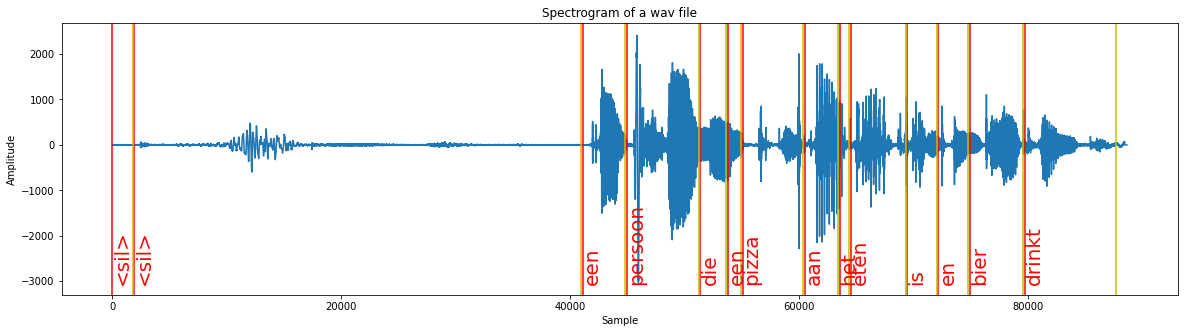

In [58]:
plot_wav(example_audio, alignment, annot_type='vertical')

In [59]:
IPython.display.Audio(example_audio)

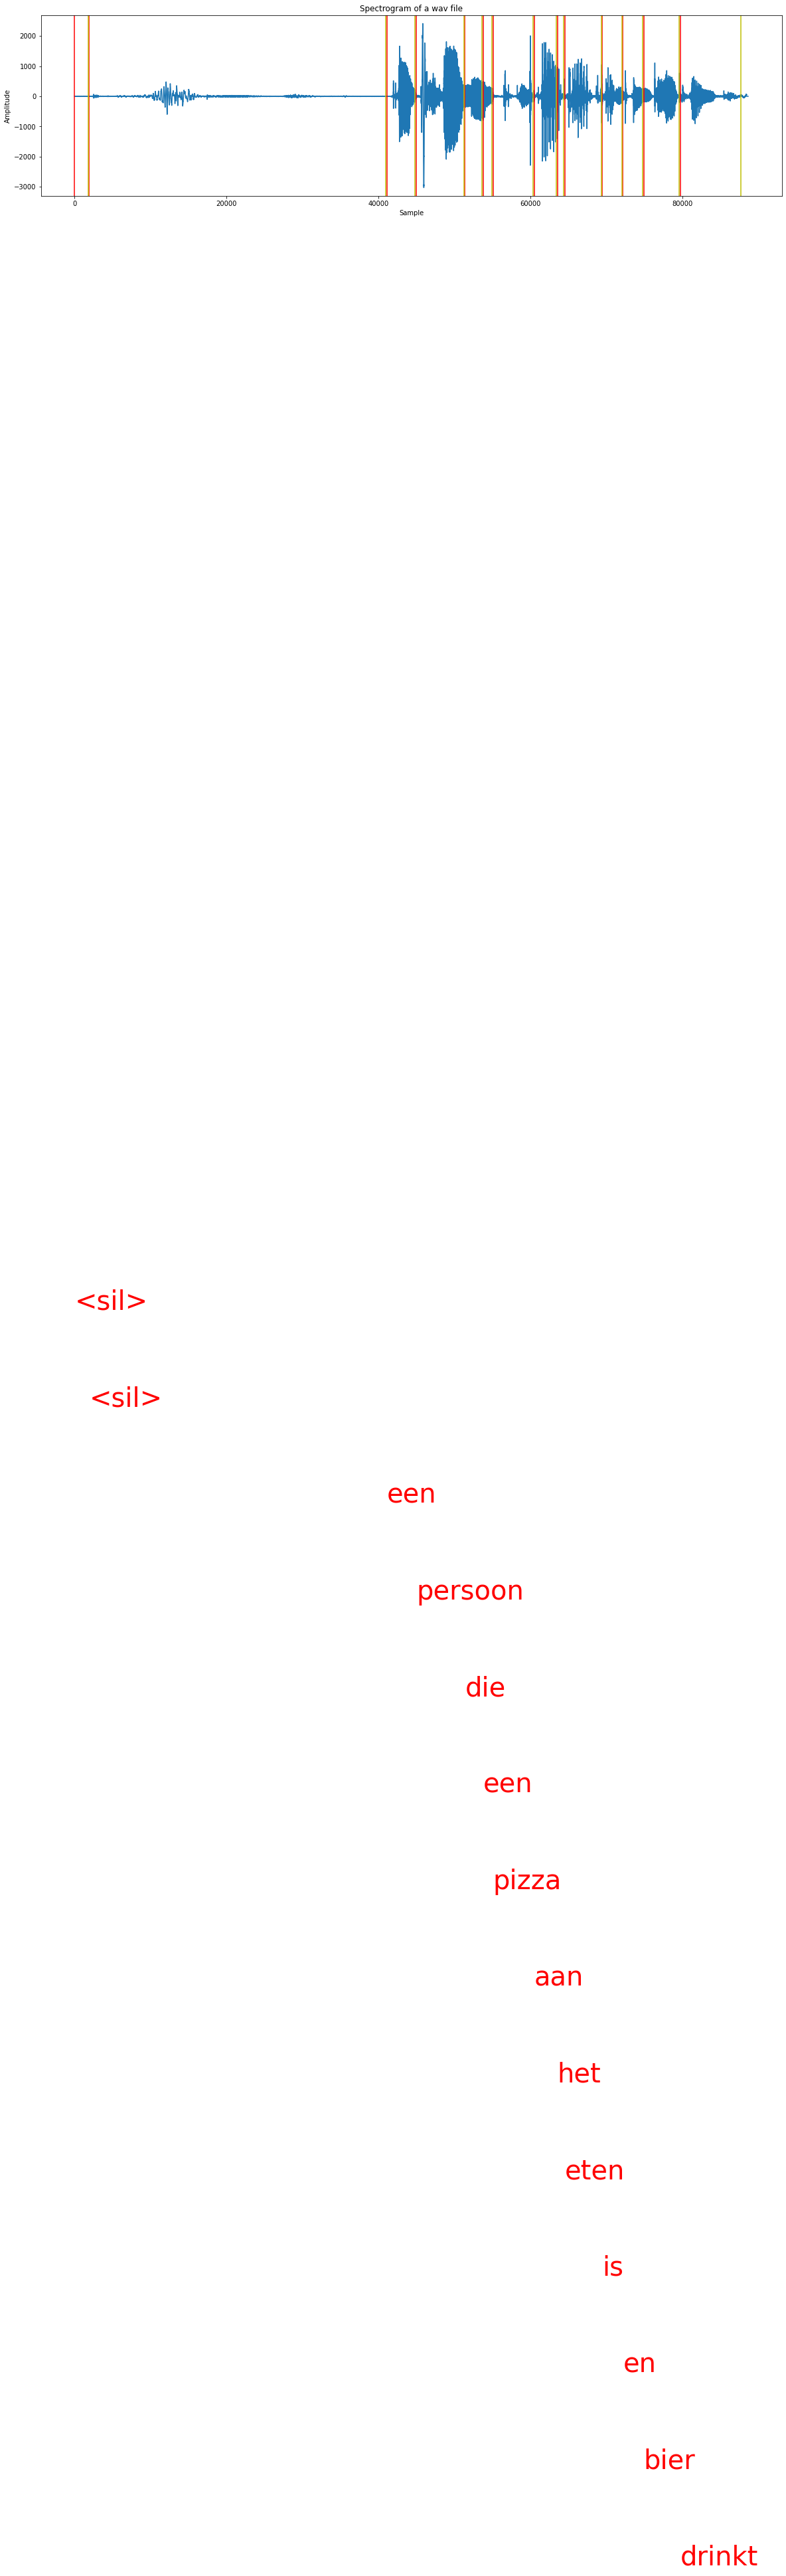

In [60]:
plot_wav(example_audio, alignment, annot_type='horizontal')